In [3]:
#!connect jupyter --kernel-name pythonkernel --kernel-spec python3
// #!connect jupyter --kernel-name pythonkernel --conda-env base --kernel-spec python3

Error: (1,1): error DNI211: The kernel name or alias 'pythonkernel' is already in use.

In [4]:
using System.Text.Json;


public static IEnumerable<object> AsEnumerable(this JsonDocument document) 
{
    foreach (var item in document.RootElement.EnumerateArray())
    {
        yield return item;
    }
}

public static IEnumerable<T> AsEnumerable<T>(this JsonDocument document) 
{
    foreach (var item in document.RootElement.EnumerateArray())
    {
        yield return item.Deserialize<T>();
    }
}


# A*

 * Heuristic: (Estimate) remaining cost to target node
 * Consistency: Heuristic must be <= that Heuristic + Path of the next node

# Search (Elfen und Orks)



In [ ]:
using System.Collections.ObjectModel;

enum BoatLocation { Start, End };

record PersonCount(int Elfen, int Orks);

record State(PersonCount Start, PersonCount End, BoatLocation Boat);


record Transition(Node To, PersonCount Transport);

static (int E, int O)[] possibleTransitions = [(1, 0), (2, 0), (1, 1), (0, 1), (0, 2)];


class Node {

    public required State State {get;init;}

    public bool DeadEnd => (State.Start.Elfen > 0 && State.Start.Orks > State.Start.Elfen) || (State.End.Elfen > 0 && State.End.Orks > State.End.Elfen);

    public List<Transition> Transitions {get;} = [];
}



static bool HasState(this Node node, State state) {
    if (node.State == state)
        return true;

    foreach (var c in node.Transitions) {
        if (c.To.HasState(state))
            return true;
    }

    return false;
}

static void BuildGraph(Node initialNode, Node currentNode) {

    var currentState = currentNode.State;
    var current = currentState.Boat == BoatLocation.Start ? currentState.Start : currentState.End;
    var target =  currentState.Boat == BoatLocation.Start ? currentState.End : currentState.Start;

    List<Node> newNodes = [];

    foreach (var t in possibleTransitions) {
        // Console.WriteLine($"Transition: {t}");
        if (t.E > current.Elfen || t.O > current.Orks) 
        {
            // Console.WriteLine($"Invalid transition. {t} | {current}");
            continue;
        }
        

        var newCurrent = new PersonCount(current.Elfen - t.E, current.Orks - t.O);
        var newTarget  = new PersonCount(target.Elfen + t.E, target.Orks + t.O);

        var targetState = currentState.Boat == BoatLocation.Start 
            ? new State(newCurrent, newTarget, BoatLocation.End)
            : new State(newTarget, newCurrent, BoatLocation.Start);

        var newNode = new Node() { State = targetState };


        var hasState = initialNode.HasState(targetState);
        if (hasState) // Don't show cycles
        {
            // Console.WriteLine("Initial state");
            continue;
        }

        currentNode.Transitions.Add(new Transition(newNode, new PersonCount(t.Item1, t.Item2)));

        if (newNode.DeadEnd) 
        {
            // Console.WriteLine("Dead end");
            continue;
        }
            
        // Cycle
        if (hasState) 
        {
            // Console.WriteLine("Initial state");
            continue;
        }
            
        newNodes.Add(newNode);
    }

    foreach (var n in newNodes) {
        // Console.WriteLine("SubNode");
         BuildGraph(initialNode, n);
    }   
}


static void BuildGraph(Node initialNode) => BuildGraph(initialNode, initialNode);

static Node BuildGraph(this State state) {
    var node = new Node { State = state };
    BuildGraph(node);
    return node;
}

static int Count(this Node node) => 1 + node.Transitions.Sum(x => x.To.Count());




In [92]:
var graph = BuildGraph(new State(new PersonCount(3, 3), new PersonCount(0, 0), BoatLocation.Start));

// graph.Count()

graph

Submission#54+Node State State { Start = PersonCount { Elfen = 3, Orks = 3 }, End = PersonCount { Elfen = 0, Orks = 0 }, Boat = Start } Start PersonCount { Elfen = 3, Orks = 3 } Elfen 3 Orks 3 End PersonCount { Elfen = 0, Orks = 0 } Elfen 0 Orks 0 Boat Start DeadEnd False Transitions index value 0 Transition { To = Submission#54+Node, Transport = PersonCount { Elfen = 1, Orks = 0 } } To Submission#54+Node State State { Start = PersonCount { Elfen = 2, Orks = 3 }, End = PersonCount { Elfen = 1, Orks = 0 }, Boat = End } Start PersonCount { Elfen = 2, Orks = 3 } Elfen 2 Orks 3 End PersonCount { Elfen = 1, Orks = 0 } Elfen 1 Orks 0 Boat End DeadEnd True Transitions (empty) Transport PersonCount { Elfen = 1, Orks = 0 } Elfen 1 Orks 0 1 Transition { To = Submission#54+Node, Transport = PersonCount { Elfen = 2, Orks = 0 } } To Submission#54+Node State State { Start = PersonCount { Elfen = 1, Orks = 3 }, End = PersonCount { Elfen = 2, Orks = 0 }, Boat = End } Start PersonCount { Elfen = 1, Orks = 3 } Elfen 1 Orks 3 End PersonCount { Elfen = 2, Orks = 0 } Elfen 2 Orks 0 Boat End DeadEnd True Transitions (empty) Transport PersonCount { Elfen = 2, Orks = 0 } Elfen 2 Orks 0 2 Transition { To = Submission#54+Node, Transport = PersonCount { Elfen = 1, Orks = 1 } } To Submission#54+Node State State { Start = PersonCount { Elfen = 2, Orks = 2 }, End = PersonCount { Elfen = 1, Orks = 1 }, Boat = End } Start PersonCount { Elfen = 2, Orks = 2 } Elfen 2 Orks 2 End PersonCount { Elfen = 1, Orks = 1 } Elfen 1 Orks 1 Boat End DeadEnd False Transitions index value 0 Transition { To = Submission#54+Node, Transport = PersonCount { Elfen = 1, Orks = 0 } } To Submission#54+Node Transport PersonCount { Elfen = 1, Orks = 0 } 1 Transition { To = Submission#54+Node, Transport = PersonCount { Elfen = 0, Orks = 1 } } To Submission#54+Node Transport PersonCount { Elfen = 0, Orks = 1 } Transport PersonCount { Elfen = 1, Orks = 1 } Elfen 1 Orks 1 3 Transition { To = Submission#54+Node, Transport = PersonCount { Elfen = 0, Orks = 1 } } To Submission#54+Node State State { Start = PersonCount { Elfen = 3, Orks = 2 }, End = PersonCount { Elfen = 0, Orks = 1 }, Boat = End } Start PersonCount { Elfen = 3, Orks = 2 } Elfen 3 Orks 2 End PersonCount { Elfen = 0, Orks = 1 } Elfen 0 Orks 1 Boat End DeadEnd False Transitions (empty) Transport PersonCount { Elfen = 0, Orks = 1 } Elfen 0 Orks 1 4 Transition { To = Submission#54+Node, Transport = PersonCount { Elfen = 0, Orks = 2 } } To Submission#54+Node State State { Start = PersonCount { Elfen = 3, Orks = 1 }, End = PersonCount { Elfen = 0, Orks = 2 }, Boat = End } Start PersonCount { Elfen = 3, Orks = 1 } Elfen 3 Orks 1 End PersonCount { Elfen = 0, Orks = 2 } Elfen 0 Orks 2 Boat End DeadEnd False Transitions (empty) Transport PersonCount { Elfen = 0, Orks = 2 } Elfen 0 Orks 2

In [ ]:
// #r "nuget: Msagl, 1.2.1"
// #r "nuget: Msagl.Drawing, 1.2.1"
// #r "nuget: Msagl.GraphViewerGDI, 1.2.1"

// using Microsoft.Msagl.Core.Geometry.Curves;
// using Microsoft.Msagl.Drawing;
// using Microsoft.Msagl.Layout.Layered;
// using Microsoft.Msagl.Miscellaneous;


Installed Packages Msagl, 1.2.1 Msagl.Drawing, 1.2.1 Msagl.GraphViewerGDI, 1.2.1

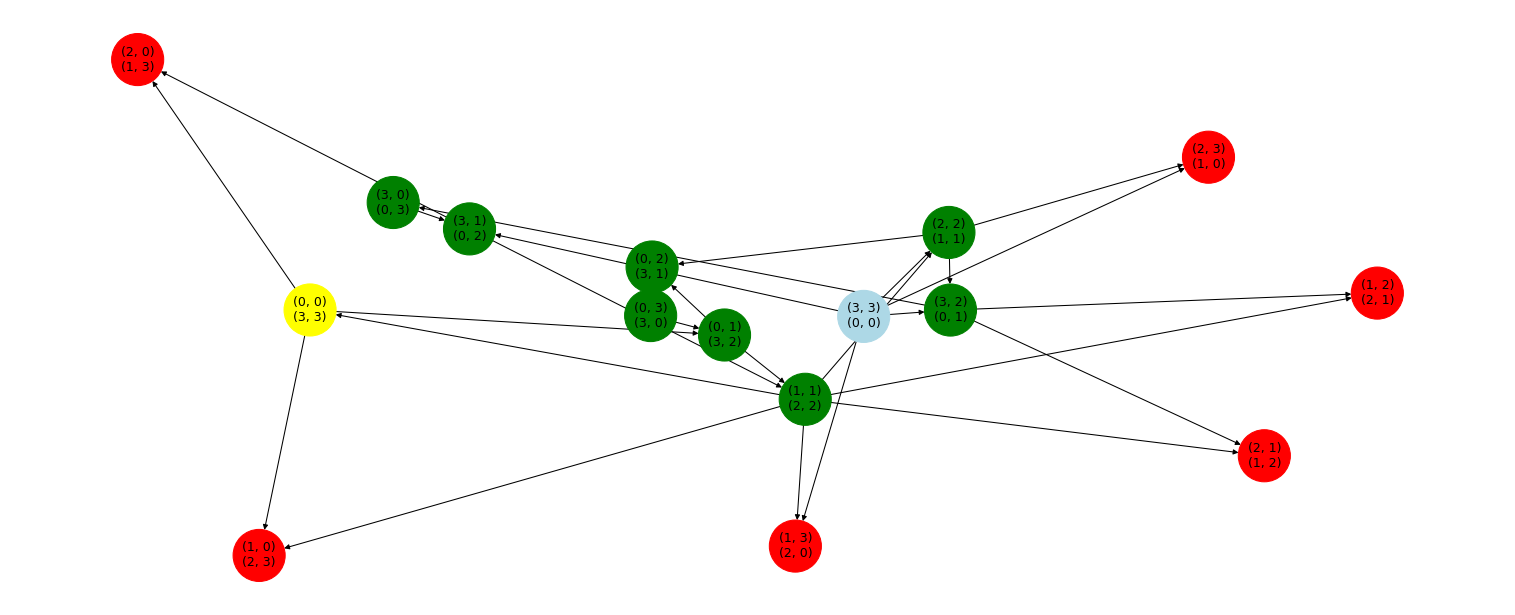

{'Start': {'Elfen': 3, 'Orks': 3}, 'End': {'Elfen': 0, 'Orks': 0}, 'Boat': 0}

In [138]:
#!set --value @csharp:graph --name graph

import networkx as nx
import matplotlib.pyplot as plt

# # Creating a graph
# G = nx.Graph()
G = nx.DiGraph()
# G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4)])
# G.add_edges_from([('aaa', 2), ('aaa', 3), (2, 4), (3, 4)])


edges = []
color_map = {}

def node_str(node):
    return f'({node["State"]["Start"]["Elfen"]}, {node["State"]["Start"]["Orks"]})\n({node["State"]["End"]["Elfen"]}, {node["State"]["End"]["Orks"]})'

def find_edges(node):
    
    if node['DeadEnd']:
        color_map[node_str(node)] = "red"
    else:
        color_map[node_str(node)] = "green"

    for t in node['Transitions']:
        edges.append(( node_str(node), node_str(t["To"]) ))

    for t in node['Transitions']:
        find_edges(t['To'])


find_edges(graph)

vertices = []
colors = []

color_map["(3, 3)\n(0, 0)"] = "lightblue"
color_map["(0, 0)\n(3, 3)"] = "yellow"
for v in color_map:
    vertices.append(v)
    colors.append(color_map[v])


G.add_nodes_from(vertices)
G.add_edges_from(edges)

# pos = nx.nx_agraph.graphviz_layout(G, prog='dot')  # 'dot' arranges nodes in a tree structure
# nx.draw(G, pos, with_labels=True, node_color=colors)

plt.figure(figsize=(20, 8), dpi=75)

nx.draw(G, with_labels=True, node_color=colors, arrows=True, node_size=2500)

plt.show()

graph["State"]

In [38]:
#!set --value @csharp:graph --name graph

graph